In [1]:
#comprehensive mutual fund data exploratory data analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
mf=pd.read_csv('mutual_funds_data.csv',na_values="-")

In [4]:
mf.head()

scheme_name  min_sip  min_lumpsum  \
0  Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                     Aditya Birla SL Arbitrage Fund     1000         1000   
2     Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3   Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4            Aditya Birla SL Balanced Advantage Fund      100          100   

   expense_ratio  fund_size_cr  fund_age_yr        fund_manager  sortino  \
0           0.27          10.0           10      Kaustubh Gupta     0.32   
1           0.36        4288.0           10    Lovelish Solanki     1.33   
2           0.53         157.0           10  Vinod Narayan Bhat     3.44   
3           0.76         637.0            4         Atul Penkar     2.18   
4           0.61        6386.0           10        Mohit Sharma     3.69   

   alpha     sd  beta  sharpe  risk_level                           amc_name  \
0   2.24   9.39  0.01    0.24           3  Aditya Birla Sun Life Mutual Fund   
1   1.53   0.72  0.56    1.10           1  Aditya Birla Sun Life Mutual Fund   
2   2.67  10.58  0.67    1.42           5  Aditya Birla Sun Life Mutual Fund   
3  -6.37  14.99  0.85    0.90           6  Aditya Birla Sun Life Mutual Fund   
4   1.99  10.38  0.68    1.39           6  Aditya Birla Sun Life Mutual Fund   

   rating           category                                    sub_category  \
0       3              Other                                   FoFs Domestic   
1       3             Hybrid                          Arbitrage Mutual Funds   
2       3              Other                                   FoFs Domestic   
3       2  Solution Oriented                                 Childrens Funds   
4       4             Hybrid  Dynamic Asset Allocation or Balanced Advantage   

   returns_1yr  returns_3yr  returns_5yr  
0          4.0          6.5          6.9  
1          5.6          4.8          5.5  
2          2.0         18.9          9.7  
3         -0.7         17.1          NaN  
4          4.5         18.6          9.7

In [5]:
mf['risk_level']=mf['risk_level'].replace({1:'low',2:'low to moderate',3:'moderate',4:'moderately high',5:'high',6:'very high'})

In [6]:
mf.shape

(814, 20)

In [7]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        791 non-null    float64
 8   alpha          772 non-null    float64
 9   sd             790 non-null    float64
 10  beta           772 non-null    float64
 11  sharpe         791 non-null    float64
 12  risk_level     814 non-null    object 
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [8]:
mf.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [9]:
mf[mf['sharpe'].isnull()]

scheme_name  min_sip  min_lumpsum  \
61                              AXIS Floater Fund     1000         5000   
64                AXIS FTP – Series 109 – 111Days        0            0   
104    Baroda BNP Paribas Banking & PSU Bond Fund      500         5000   
125  BHARAT Bond FOF – April 2025 – Direct Growth      500         1000   
154                              DSP Floater Fund      500          500   
398            Invesco India Medium Duration Fund     1000         1000   
411                   ITI Banking & PSU Debt Fund      500         5000   
412                         ITI Dynamic Bond Fund      500         5000   
417                 ITI Ultra Short Duration Fund      500         5000   
461                       L&T Focused Equity Fund      500         5000   
495         Mahindra Manulife Short Duration Fund      500         1000   
497         Mirae Asset Banking and PSU Debt Fund     1000         5000   
499               Mirae Asset Corporate Bond Fund     1000         5000   
509                 Mirae Asset Money Market Fund     1000         5000   
514         Mirae Asset Ultra Short Duration Fund     1000         5000   
532                      Navi ELSS Tax Saver Fund      500          500   
631                   SBI Floating Rate Debt Fund      500         5000   
720                       Tata Floating Rate Fund      150         5000   
755               TRUSTMF Banking & PSU Debt Fund     1000         1000   
756                           TRUSTMF Liquid Fund     1000         1000   
757                       TRUSTMF Short Term Fund     1000         1000   
769                    Union Medium Duration Fund      500         1000   
770                       Union Money Market Fund     2000         5000   

     expense_ratio  fund_size_cr  fund_age_yr          fund_manager  sortino  \
61            0.16         416.0            2        Aditya Pagaria      NaN   
64            0.00         565.0            1           Devang Shah      NaN   
104           0.39          40.0            2       Prashant Pimple      NaN   
125           0.06        3912.0            3          Dhawal Dalal      NaN   
154           0.24         983.0            2          Kedar Karnik      NaN   
398           0.40         306.0            2            Vikas Garg      NaN   
411           0.15          27.0            2         Vikrant Mehta      NaN   
412           0.14          57.0            2         Vikrant Mehta      NaN   
417           0.10         119.0            2         Vikrant Mehta      NaN   
461           1.09         946.0            4     Venugopal Manghat      NaN   
495           0.29          43.0            2             Rahul Pal      NaN   
497           0.34          89.0            3          Basant Bafna      NaN   
499           0.46          57.0            2        Mahendra Jajoo      NaN   
509           0.25          59.0            2          Basant Bafna      NaN   
514           0.29         284.0            2          Basant Bafna      NaN   
532           0.40          56.0            7          Aditya Mulki      NaN   
631           0.26        1604.0            2  Rajeev Radhakrishnan      NaN   
720           0.30         225.0            2          Akhil Mittal      NaN   
755           0.21         345.0            2         Anand Nevatia      NaN   
756           0.10         205.0            2         Anand Nevatia      NaN   
757           0.23          94.0            2         Anand Nevatia      NaN   
769           0.64         170.0            3       Parijat Agrawal      NaN   
770           0.24         144.0            2       Parijat Agrawal      NaN   

     alpha  sd  beta  sharpe       risk_level                        amc_name  \
61     NaN NaN   NaN     NaN  low to moderate                Axis Mutual Fund   
64     NaN NaN   NaN     NaN         moderate                Axis Mutual Fund   
104    NaN NaN   NaN     NaN  low to moderate  Baroda BNP Paribas Mutual 

In [10]:
mf.groupby('category')[['sortino','alpha','beta','sd','sharpe']].mean().T

category      Debt     Equity    Hybrid      Other  Solution Oriented
sortino   2.139885   3.110392  2.776552   2.420633           2.589286
alpha     2.160000   3.402550  2.486034   0.513594           0.700357
beta      0.807214   0.878642  0.707155   0.850938           0.765714
sd        2.092107  16.959477  7.493190  15.480506          10.272143
sharpe    0.892366   1.459837  1.311638   1.090253           1.204286

In [11]:
#mf.groupby('category')[['sortino','alpha','beta','sd','sharpe']].apply(lambda x:x.fillna(x.mean()))

In [12]:
mf['sortino']=mf.groupby('category')['sortino'].apply(lambda x:x.fillna(x.mean()))

In [13]:
# can also use 'transform' insted of 'apply' as transform is used to align the indices

In [14]:
mf['alpha']=mf.groupby('category')['alpha'].apply(lambda x: x.fillna(x.mean()))

In [15]:
mf['beta']=mf.groupby('category')['beta'].apply(lambda x:x.fillna(x.mean()))

In [16]:
mf['sd']=mf.groupby('category')['sd'].apply(lambda x: x.fillna(x.mean()))

In [17]:
mf['sharpe']=mf.groupby('category')['sharpe'].apply(lambda x:x.fillna(x.mean()))

In [18]:
mf['returns_3yr']=mf.groupby('category')['returns_3yr'].apply(lambda x:x.fillna(x.mean()))

In [19]:
mf['returns_5yr']=mf.groupby('category')['returns_5yr'].apply(lambda x:x.fillna(x.mean()))

In [20]:
mf.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [21]:
pd.set_option("display.max_rows",None)
mf['sharpe'].describe()

count    814.000000
mean       1.197011
std        0.531163
min       -0.820000
25%        0.894275
50%        1.290000
75%        1.540000
max        3.520000
Name: sharpe, dtype: float64

<AxesSubplot:xlabel='alpha', ylabel='returns_1yr'>

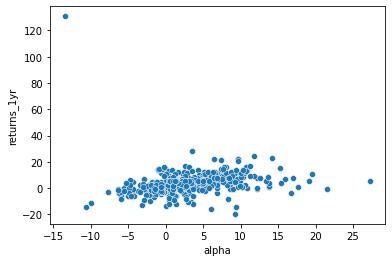

In [22]:
sns.scatterplot(data=mf,x='alpha',y='returns_1yr')

<AxesSubplot:xlabel='alpha', ylabel='returns_3yr'>

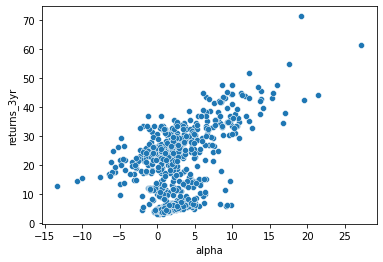

In [23]:
sns.scatterplot(data=mf,x='alpha',y='returns_3yr')

<AxesSubplot:xlabel='alpha', ylabel='returns_5yr'>

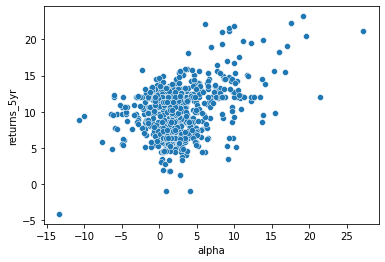

In [24]:
sns.scatterplot(data=mf,x='alpha',y='returns_5yr')

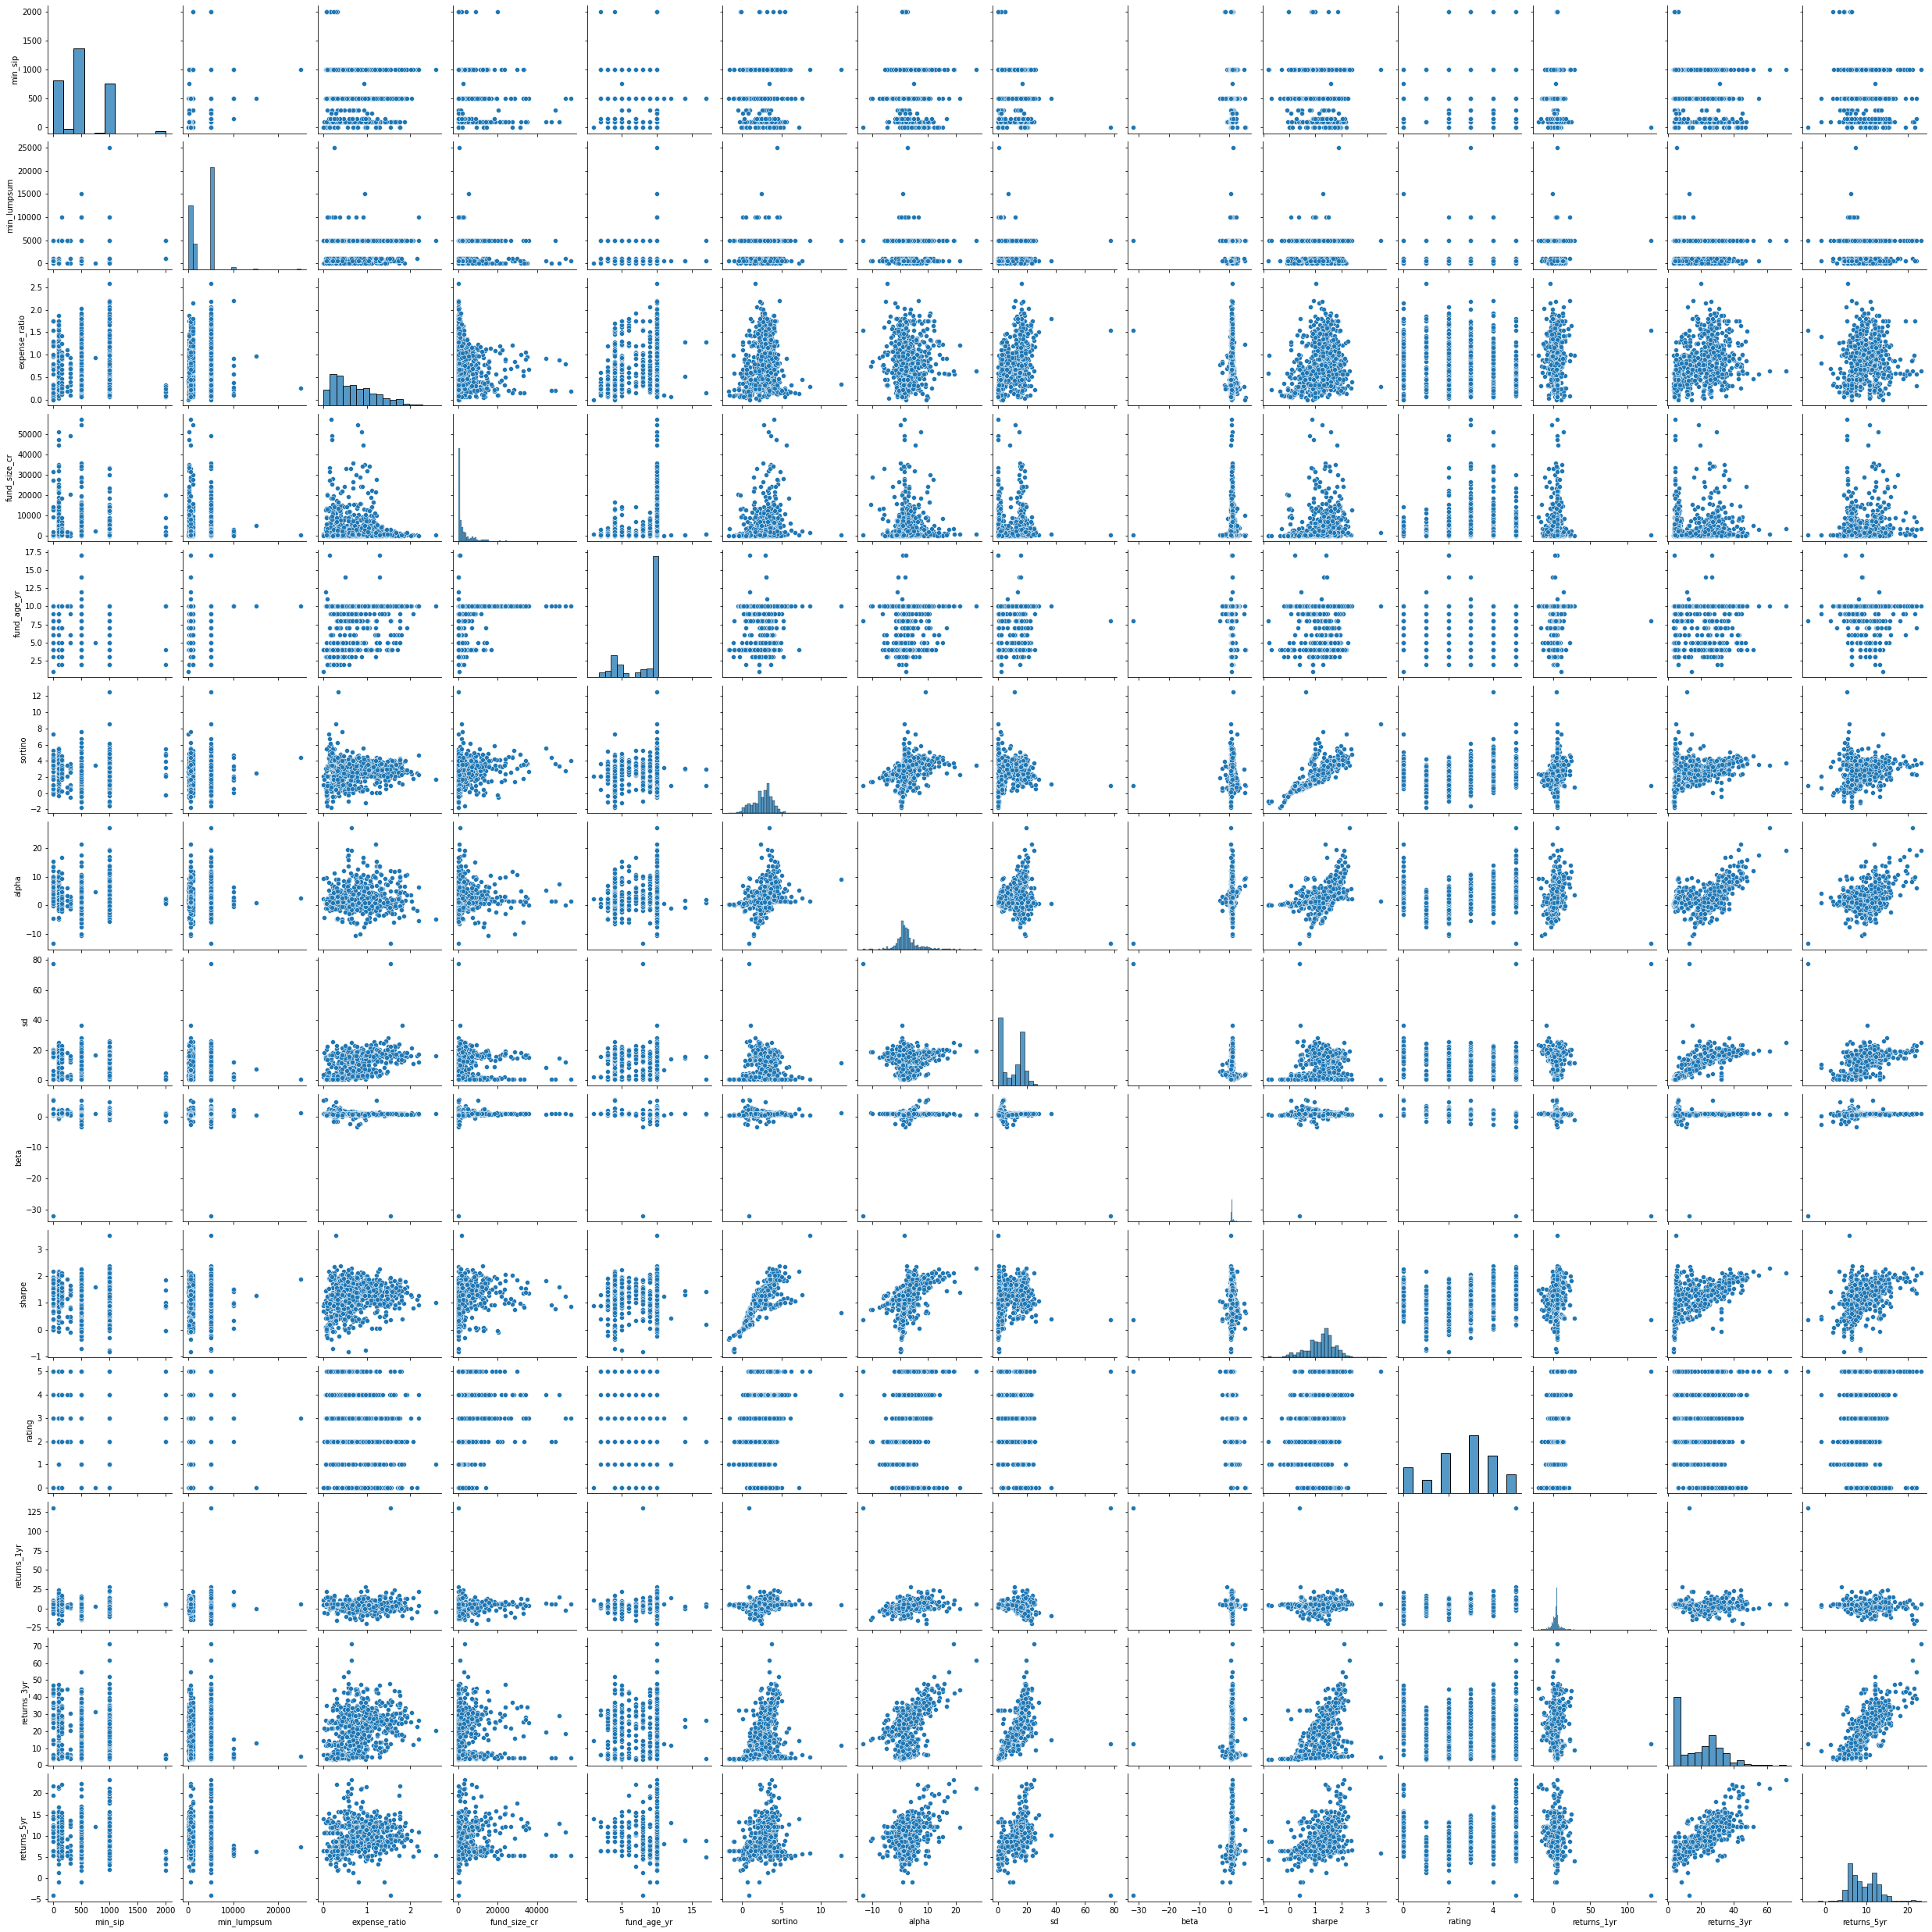

In [25]:
sns.pairplot(data=mf)

<AxesSubplot:xlabel='returns_5yr'>

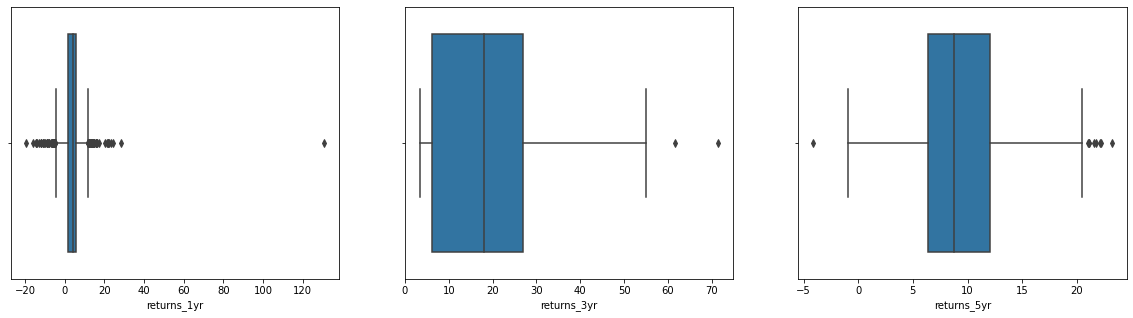

In [26]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[20,5])
sns.boxplot(mf['returns_1yr'],ax=ax[0])
sns.boxplot(mf['returns_3yr'],ax=ax[1])
sns.boxplot(mf['returns_5yr'],ax=ax[2])

#### Analysis On Fund Manager

In [27]:
top10_fm=mf['fund_manager'].value_counts().sort_values(ascending=True).nlargest(10)

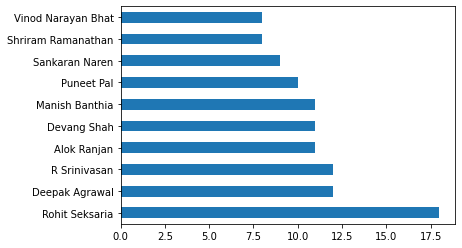

In [28]:
top10_fm.plot(kind='barh')
plt.show()

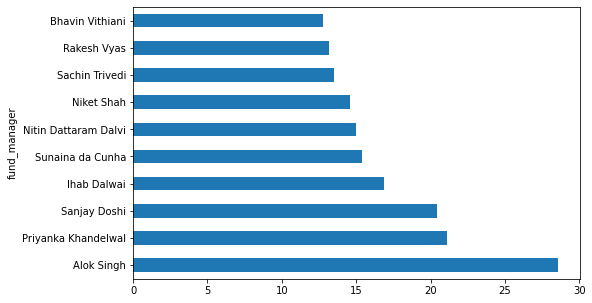

In [29]:
plt.figure(figsize=(8,5))
top10_fm_yr1=mf.groupby('fund_manager')['returns_1yr'].mean().sort_values(ascending=False).iloc[0:10]
top10_fm_yr1.plot(kind='barh')
plt.show()

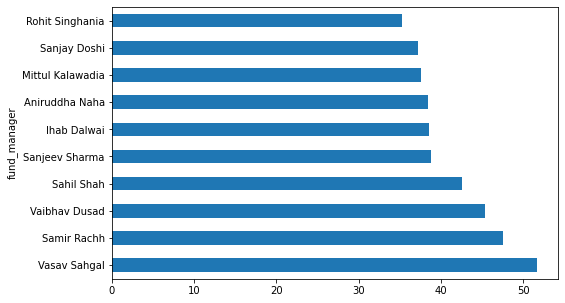

In [30]:
plt.figure(figsize=(8,5))
top10_fm_yr1=mf.groupby('fund_manager')['returns_3yr'].mean().sort_values(ascending=False).iloc[0:10]
top10_fm_yr1.plot(kind='barh')
plt.show()

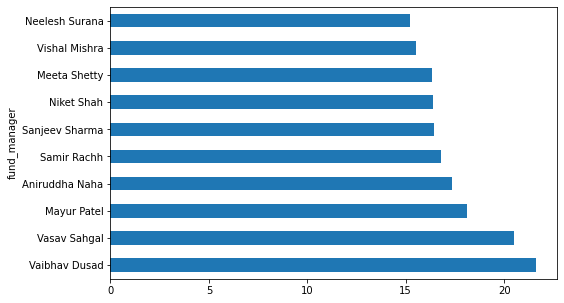

In [31]:
plt.figure(figsize=(8,5))
top10_fm_yr1=mf.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).iloc[0:10]
top10_fm_yr1.plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='category'>

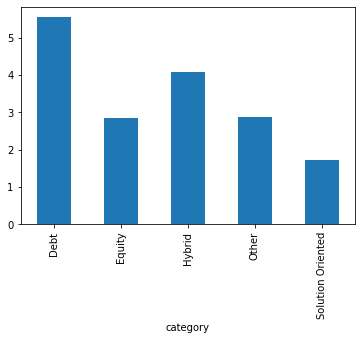

In [32]:
category_mean=mf.groupby('category')['returns_1yr'].mean()
category_mean.plot(kind='bar')

In [33]:
mf['category'].unique()

array(['Other', 'Hybrid', 'Solution Oriented', 'Equity', 'Debt'],
      dtype=object)

In [34]:
# finding category wise top fund managers
debt_mf=mf[mf['category']=='Debt']
hybrid_mf=mf[mf['category']=='Hybrid']
equity_mf=mf[mf['category']=='Equity']
solution_mf=mf.groupby('category').get_group('Solution Oriented')
other_mf=mf.groupby('category').get_group('Other')

In [35]:
top_5_debt=debt_mf.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head()
top_5_equity=equity_mf.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head()
top_5_hybrid=hybrid_mf.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head()
top_5_solution=solution_mf.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head()
top_5_other=other_mf.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head()

<AxesSubplot:xlabel='fund_manager'>

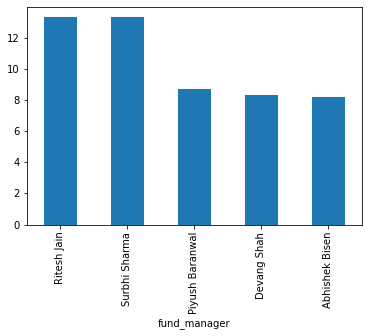

In [36]:
top_5_debt.plot(kind='bar')

<AxesSubplot:xlabel='fund_manager'>

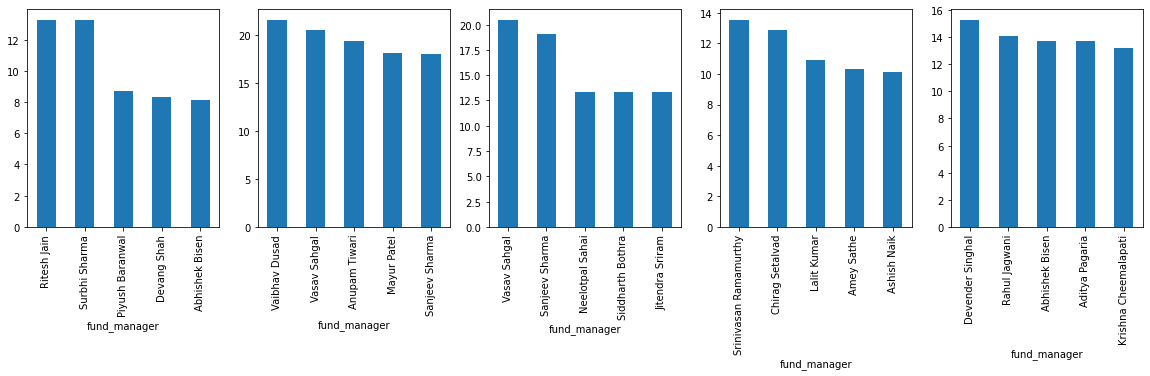

In [37]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,4))
top_5_debt.plot(kind='bar',ax=ax[0])
top_5_equity.plot(kind='bar',ax=ax[1])
top_5_hybrid.plot(kind='bar',ax=ax[2])
top_5_solution.plot(kind='bar',ax=ax[3])
top_5_other.plot(kind='bar',ax=ax[4])

In [38]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    float64
 8   alpha          814 non-null    float64
 9   sd             814 non-null    float64
 10  beta           814 non-null    float64
 11  sharpe         814 non-null    float64
 12  risk_level     814 non-null    object 
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

### Analysis of Fund Age

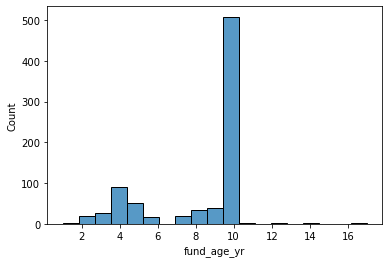

In [39]:
sns.histplot(mf['fund_age_yr'])
plt.show()

In [40]:
import plotly.express as px
fig=px.histogram(mf,x='fund_age_yr',color='category')
fig.update_layout(width=800,height=400)
fig.show()

### Analysis on Risk Level

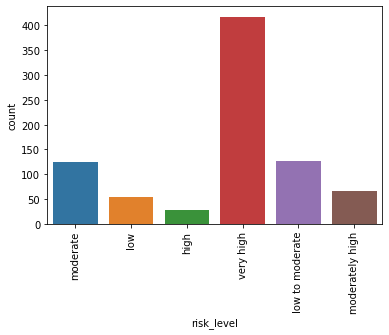

In [41]:
# total no of schemes in each risk level
sns.countplot(data=mf,x=mf['risk_level'])
plt.xticks(rotation='vertical')
plt.show()

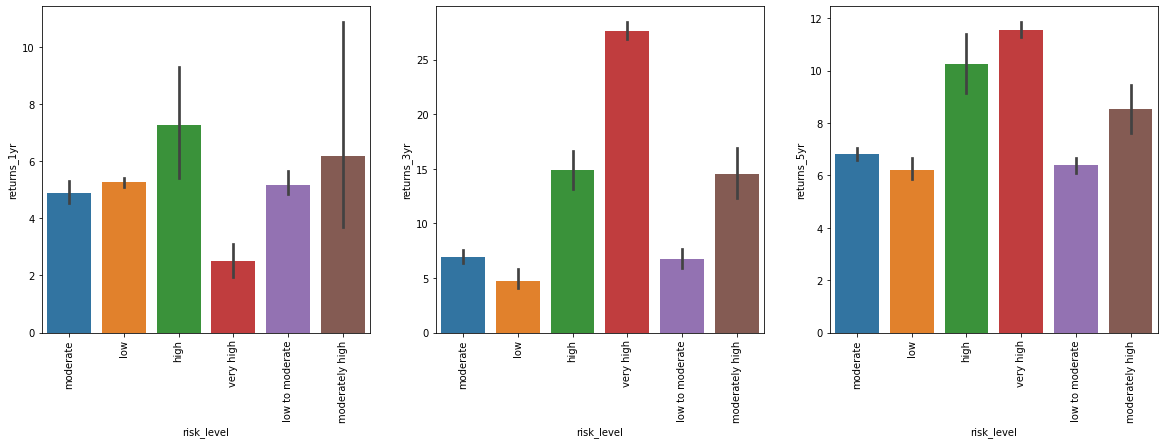

In [42]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[20,6])
sns.barplot(data=mf,x='risk_level',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(rotation='vertical',labels=mf['risk_level'].unique())
sns.barplot(data=mf,x='risk_level',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(rotation='vertical',labels=mf['risk_level'].unique())
sns.barplot(data=mf,x='risk_level',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(rotation='vertical',labels=mf['risk_level'].unique())
plt.show()

### Analysis of Rating

<AxesSubplot:xlabel='rating', ylabel='count'>

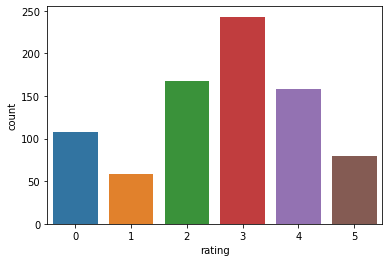

In [43]:
sns.countplot(data=mf,x='rating')

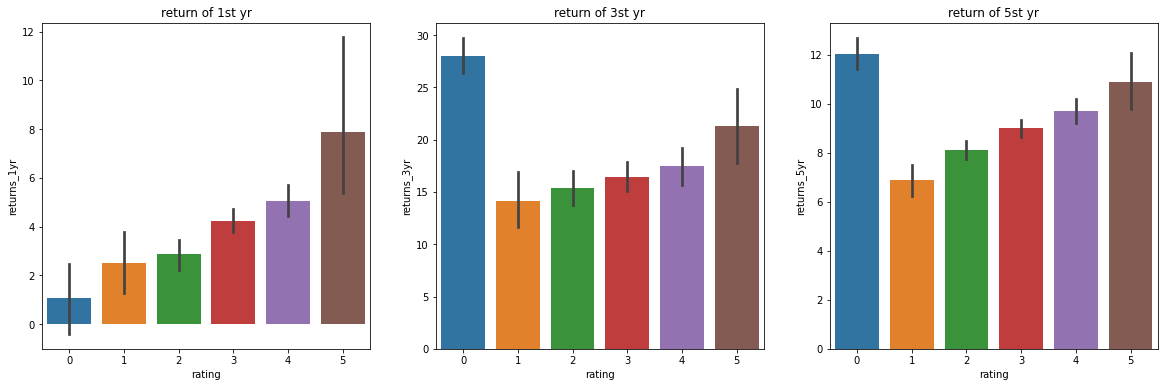

In [44]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[20,6])
sns.barplot(data=mf,x='rating',y='returns_1yr',ax=ax[0])
sns.barplot(data=mf,x='rating',y='returns_3yr',ax=ax[1])
sns.barplot(data=mf,x='rating',y='returns_5yr',ax=ax[2])

ax[0].set_title('return of 1st yr')
ax[1].set_title('return of 3st yr')
ax[2].set_title('return of 5st yr')
plt.show()

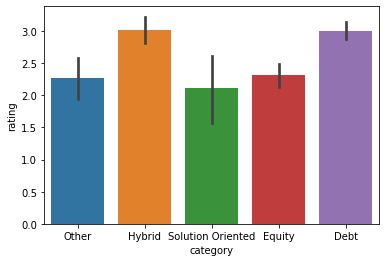

In [45]:
sns.barplot(data=mf,x='category',y='rating')
plt.show()

In [46]:
crosstab=pd.crosstab(mf['rating'],mf['category'],normalize='index')
crosstab

category      Debt    Equity    Hybrid     Other  Solution Oriented
rating                                                             
0         0.037037  0.722222  0.018519  0.175926           0.046296
1         0.379310  0.310345  0.172414  0.068966           0.068966
2         0.392857  0.321429  0.148810  0.083333           0.053571
3         0.395062  0.312757  0.160494  0.111111           0.020576
4         0.405063  0.329114  0.170886  0.075949           0.018987
5         0.379747  0.379747  0.164557  0.050633           0.025316

<AxesSubplot:xlabel='category', ylabel='rating'>

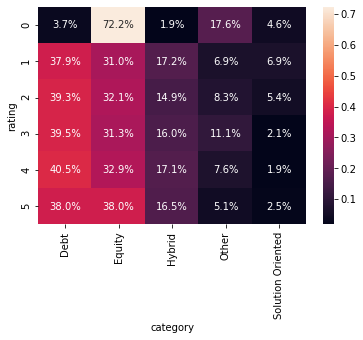

In [47]:
sns.heatmap(crosstab,annot=True,fmt='.1%')

<AxesSubplot:xlabel='category', ylabel='rating'>

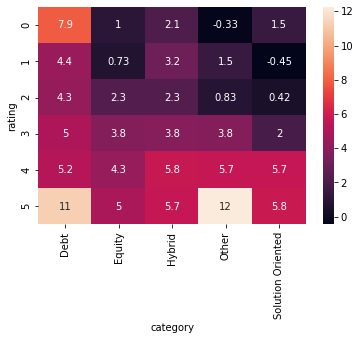

In [48]:
sns.heatmap(pd.pivot_table(mf,index='rating',columns='category',values='returns_1yr'),annot=True)

### Analysis on Category

<AxesSubplot:xlabel='category', ylabel='count'>

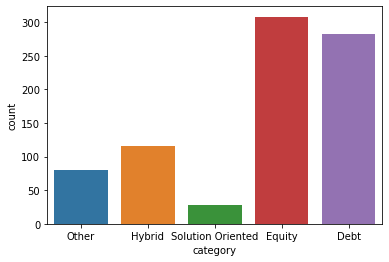

In [49]:
sns.countplot(x=mf['category'])

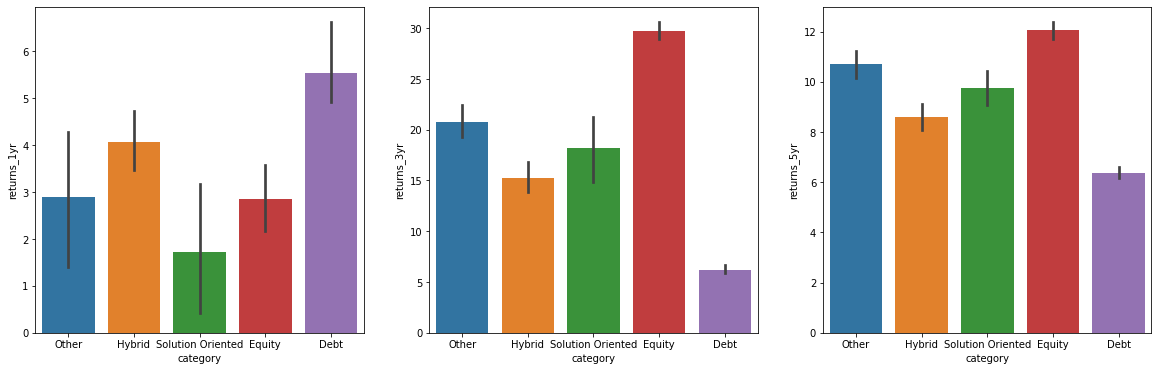

In [50]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[20,6])
sns.barplot(data=mf,x='category',y='returns_1yr',ax=ax[0])
sns.barplot(data=mf,x='category',y='returns_3yr',ax=ax[1])
sns.barplot(data=mf,x='category',y='returns_5yr',ax=ax[2])
plt.show()

### Analysis of Sub-category

<AxesSubplot:xlabel='count', ylabel='sub_category'>

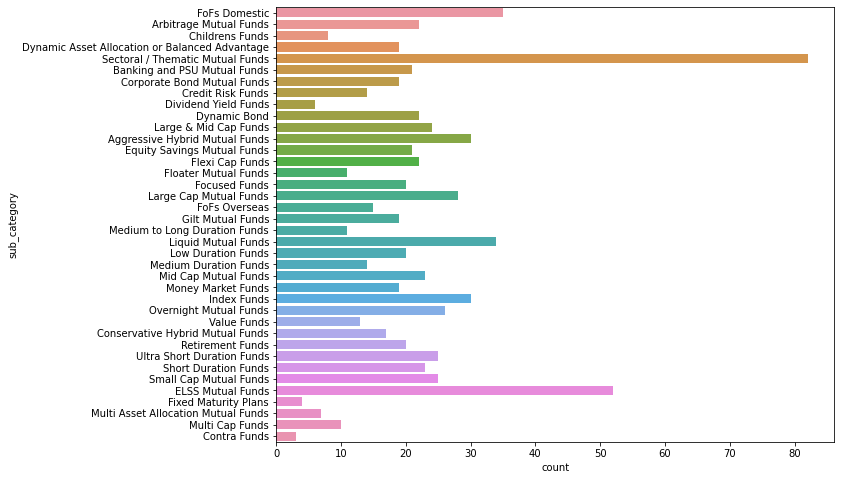

In [51]:
plt.figure(figsize=[10,8])
sns.countplot(y=mf['sub_category'])

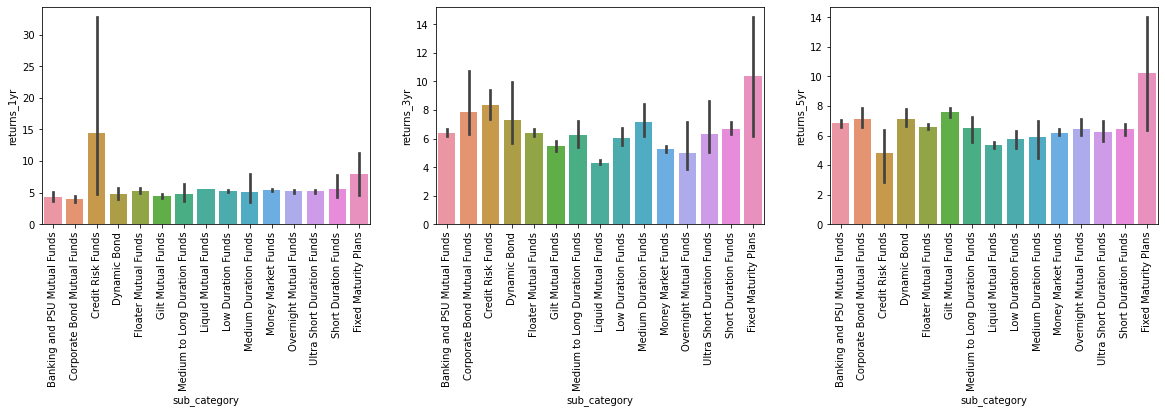

In [52]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[20,4])
sns.barplot(data=debt_mf,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(debt_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=debt_mf,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(debt_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=debt_mf,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(debt_mf['sub_category'].unique(),rotation='vertical')
plt.show()

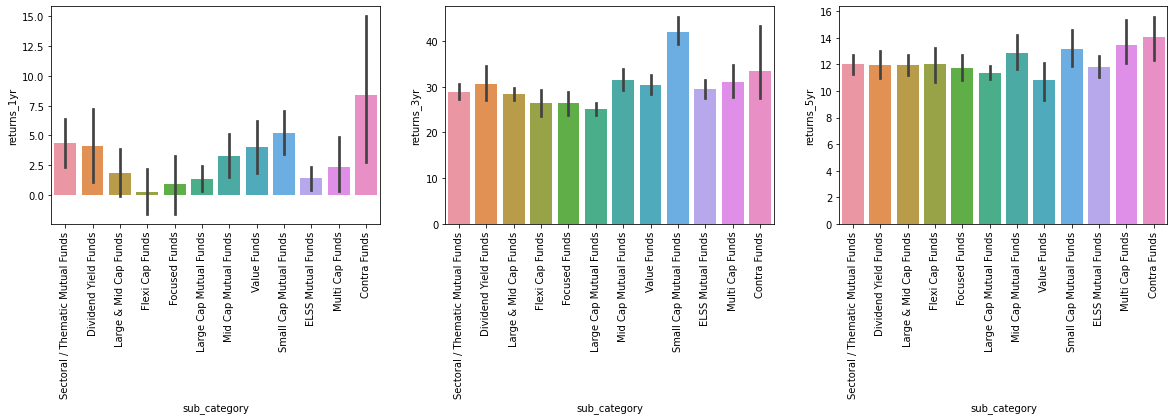

In [53]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[20,4])
sns.barplot(data=equity_mf,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(equity_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=equity_mf,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(equity_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=equity_mf,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(equity_mf['sub_category'].unique(),rotation='vertical')
plt.show()

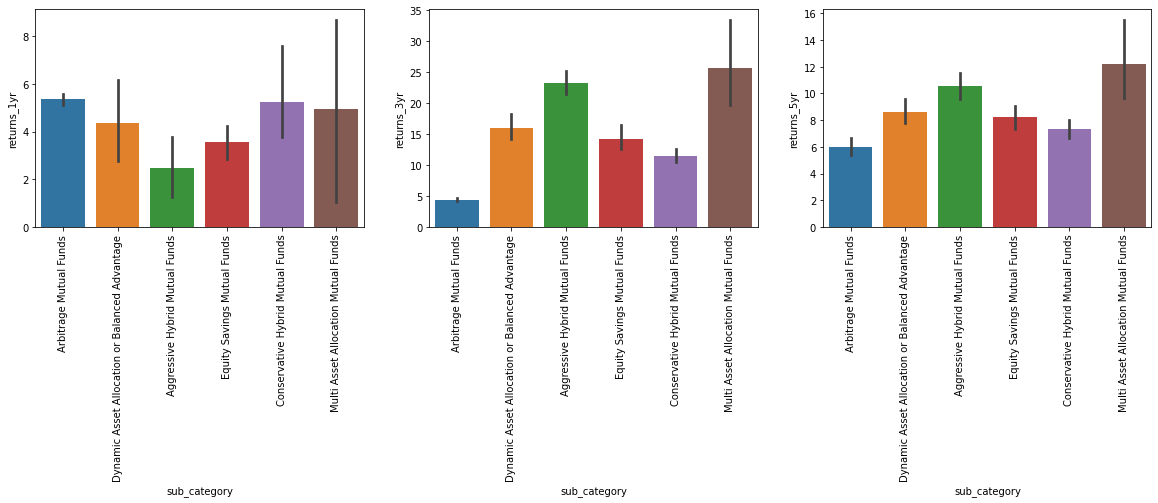

In [54]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[20,4])
sns.barplot(data=hybrid_mf,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(hybrid_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=hybrid_mf,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(hybrid_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=hybrid_mf,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(hybrid_mf['sub_category'].unique(),rotation='vertical')
plt.show()

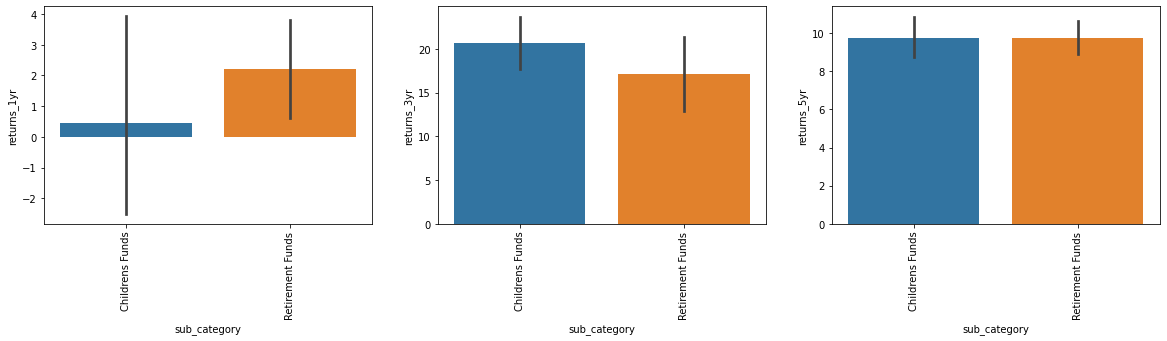

In [55]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[20,4])
sns.barplot(data=solution_mf,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(solution_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=solution_mf,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(solution_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=solution_mf,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(solution_mf['sub_category'].unique(),rotation='vertical')
plt.show()

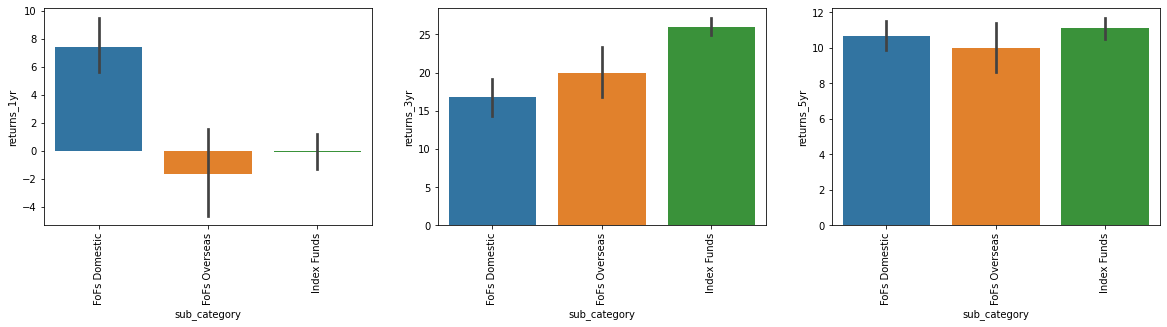

In [56]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[20,4])
sns.barplot(data=other_mf,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(other_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=other_mf,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(other_mf['sub_category'].unique(),rotation='vertical')
sns.barplot(data=other_mf,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(other_mf['sub_category'].unique(),rotation='vertical')
plt.show()

### Analysis of Alpha

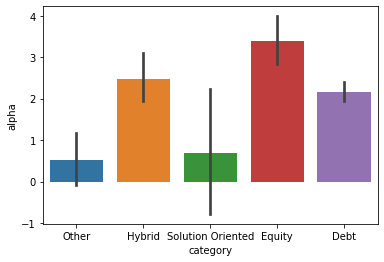

In [57]:
# alpha vs category
sns.barplot(data=mf,x='category',y='alpha')
plt.show()

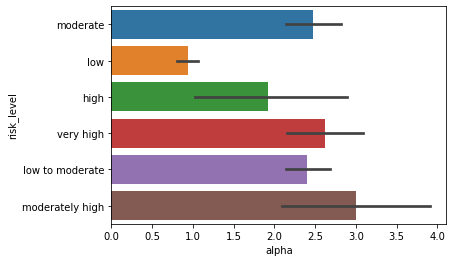

In [58]:
sns.barplot(data=mf,y='risk_level',x='alpha')
plt.show()

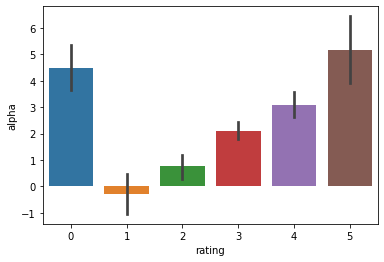

In [59]:
sns.barplot(data=mf,x='rating',y='alpha')
plt.show()